<a href="https://colab.research.google.com/github/AverYuchen/myFitRoom/blob/main/notebooks/avery_full_body_bottom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Set up environment

In [ ]:
%cd /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion

/content/drive/.shortcut-targets-by-id/1J1aU0RBc-zH-KjIQ7nBmkEfzWWfVDQhb/Experiment_AI_Final_Project/OOTDiffusion


In [ ]:
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2
!pip install -r requirements.txt

  Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached scikit_image-0.21.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached Pillow-9.4.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.3 kB)
  Using cached diffusers-0.24.0-py3-none-any.whl.metadata (18 kB)
  Using cached transformers-4.36.2-py3-none-any.whl.metadata (126 kB)
  Using cached accelerate-0.26.1-py3-none-any.whl.metadata (18 kB)
  Using cached matplotlib-3.7.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.7 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl.metadata (57 kB)
  Using cached gradio-4.16.0-py3-none-any.whl.metadata (15 kB)
  Using cached config-0.5.1-py2.py3-none-any

In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip show huggingface_hub

Name: huggingface-hub
Version: 0.19.4
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: https://github.com/huggingface/huggingface_hub
Author: Hugging Face, Inc.
Author-email: julien@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, packaging, pyyaml, requests, tqdm, typing-extensions
Required-by: accelerate, diffusers, gradio, gradio_client, peft, sentence-transformers, timm, tokenizers, transformers


In [ ]:
!pip show diffusers

Name: diffusers
Version: 0.24.0
Summary: State-of-the-art diffusion in PyTorch and JAX.
Home-page: https://github.com/huggingface/diffusers
Author: The HuggingFace team
Author-email: patrick@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, importlib-metadata, numpy, Pillow, regex, requests, safetensors
Required-by: 


In [ ]:
# !pip uninstall -y peft huggingface-hub diffusers
# # !pip uninstall -y peft huggingface-hub

# !pip install huggingface-hub==0.19.4
# !pip install diffusers==0.24.0
# !pip install peft==0.7.0

# 2. Text-to-image

In [ ]:
import torch
from diffusers import DiffusionPipeline
from IPython.display import display

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
# Load Previous Pipeline
pipeline = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2", revision=None, variant=None, torch_dtype=torch.float32
)
pipeline = pipeline.to(device)

# Load attention processors
pipeline.unet.load_attn_procs("NouRed/sd-fashion-products")

# Run Inference
generator = torch.Generator(device=device)
seed = 42
if seed is not None:
    generator = generator.manual_seed(seed)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
prompt = "a pair of white sweat pants that has black cats print"
image = pipeline(prompt, num_inference_steps=30, generator=generator).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

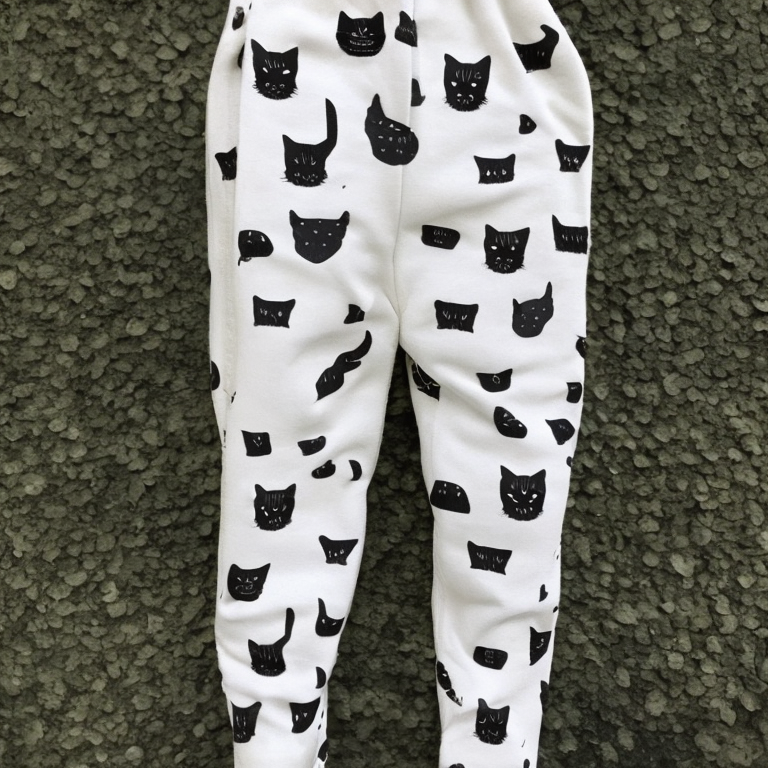

In [ ]:
display(image)

  0%|          | 0/30 [00:00<?, ?it/s]

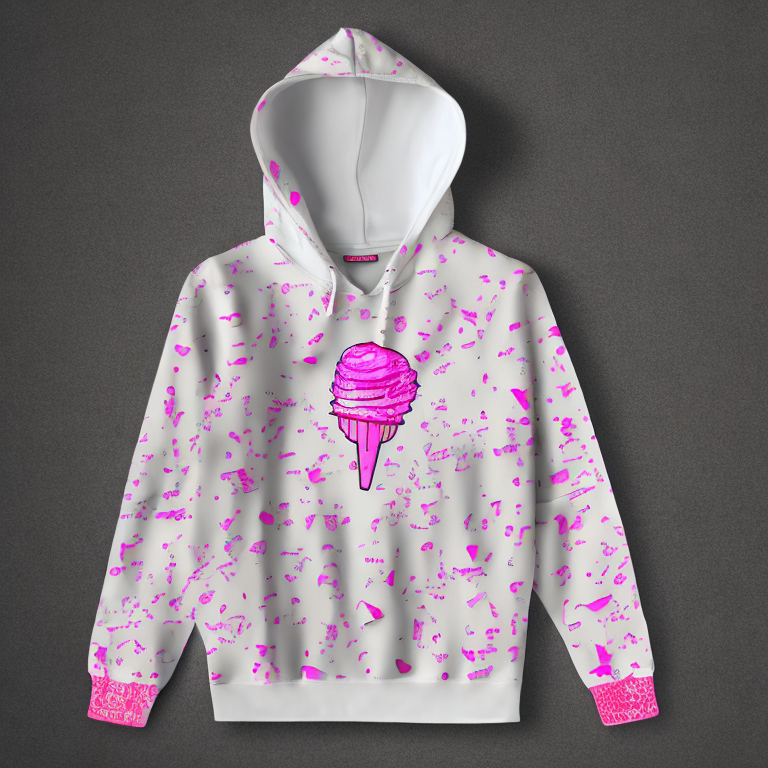

In [ ]:
prompt = "a white hoodie with pink ice-cream patterns, on a pure background"
image_test = pipeline(prompt, num_inference_steps=30, generator=generator).images[0]
display(image_test)

# 3. Compress image and save it

In [ ]:
from PIL import Image

# Cut size
width, height = image.size
new_size = (width // 2, height // 2)
resized_img = image.resize(new_size, Image.LANCZOS)

# Compress quality
save_path = '/content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/save_images/blackcat_sweatpants2.jpg'
resized_img.save(save_path, 'JPEG', quality=50)

In [ ]:
from PIL import Image

# Cut size
width, height = image_test.size
new_size = (width // 2, height // 2)
resized_img = image_test.resize(new_size, Image.LANCZOS)

# Compress quality
save_path = '/content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/save_images/icecreamTop.jpg'
resized_img.save(save_path, 'JPEG', quality=50)

# 4. OOTDiffusion

In [ ]:
%cd /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run

/content/drive/.shortcut-targets-by-id/1J1aU0RBc-zH-KjIQ7nBmkEfzWWfVDQhb/Experiment_AI_Final_Project/OOTDiffusion/run


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from IPython.display import Image, display

## half-body model

In [ ]:
!python run_ootd.py --model_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/examples/model/01861_00.jpg --cloth_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/save_images/peacock.jpg --scale 2.0 --sample 4 --save peacock

python3: can't open file '/content/run_ootd.py': [Errno 2] No such file or directory


## full-body model
0-upperbody; 1-lowerbody; 2-dress

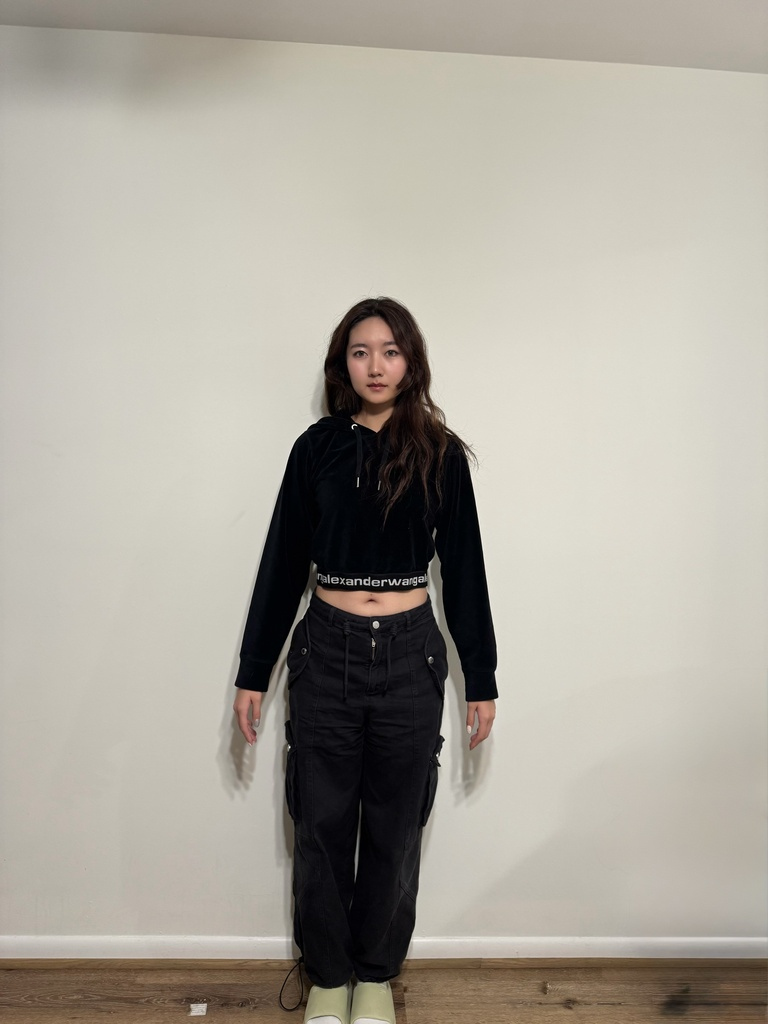

In [ ]:
display(Image('/content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/examples/model/avery.jpg'))

In [ ]:
!python run_ootd.py --model_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/examples/model/avery.jpg --cloth_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/save_images/icecreamTop.jpg --scale 2.0 --sample 4 --save iceCreamHoodie --model_type dc --category 0

2024-12-17 04:48:26.358900: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 04:48:26.380335: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 04:48:26.387102: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 04:48:27.640315: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading pipeline components...: 100% 7/7 [00:01<00:00,  4.34it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which w

In [ ]:
!python run_ootd.py --model_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/examples/model/avery.jpg --cloth_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/save_images/blackcat_sweatpants2.jpg --scale 2.0 --sample 4 --save blackcatPants --model_type dc --category 1

In [ ]:
!python run_ootd.py --model_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/examples/model/avery.jpg --cloth_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/save_images/blackcat_sweatpants.jpg --scale 2.0 --sample 4 --save blackcatSweatPants --model_type dc --category 1

2024-12-17 04:49:11.243027: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 04:49:11.265239: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 04:49:11.271797: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 04:49:12.538263: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading pipeline components...: 100% 7/7 [00:01<00:00,  4.91it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which w

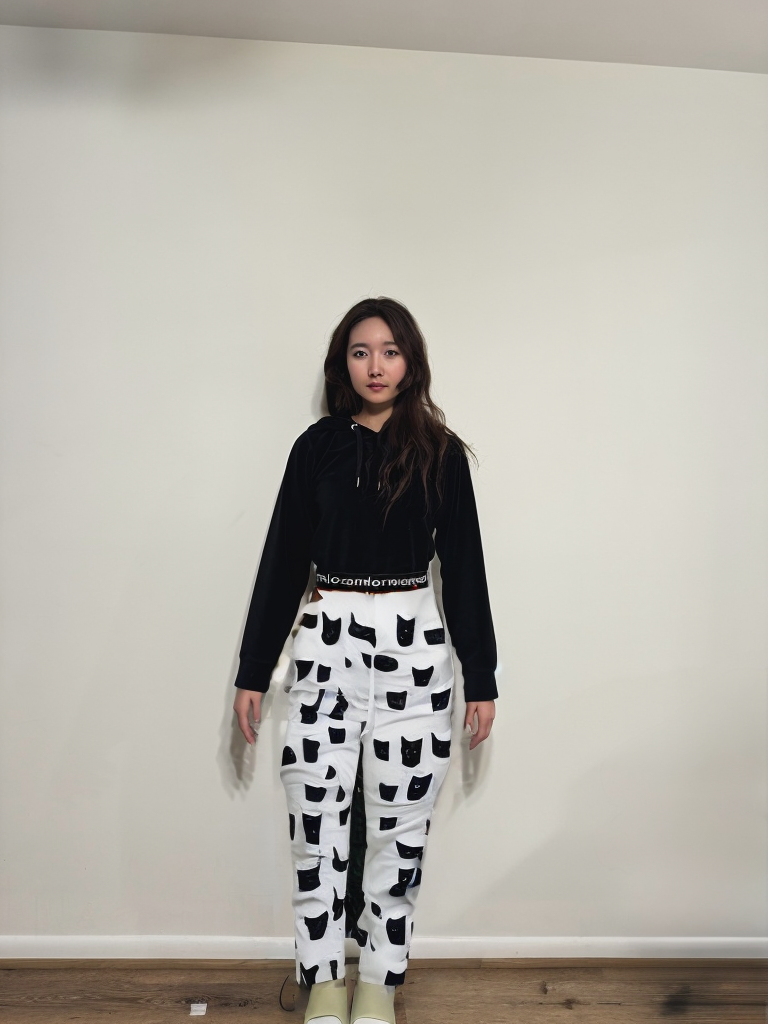

In [ ]:
display(Image('/content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/images_output/dc/blackcatPants_out_dc_0.png'))